# case0222 - Cholesterol In Urban And Rural Guatemalans
[https://www.rdocumentation.org/packages/Sleuth2/versions/2.0-4/topics/ex0222](https://www.rdocumentation.org/packages/Sleuth2/versions/2.0-4/topics/ex0222)

### Popis dat
Dataset pochází ze studie provedené na guatemalských indiánech. Míra cholesterolu byla změřena celkem 94 jedincům a byl zaznamenán jejich původ. Bylo naměřeno 49 pozorování na venkově a 45 ve městě.

### Formát
Dataframe obsahuje 94 pozorování na následujících 2 proměnných:

- **Cholesterol** - Množství cholesterolu v krvi člověka (v mg/l).
- **Group** - Proměnná obsahující hodnoty "Rural" a "Urban" označující, jestli je subjekt z venkova, nebo z města.

### Zdroj
Ramsey, F.L. and Schafer, D.W. (2002). The Statistical Sleuth: A Course in Methods of Data Analysis (2nd ed), Duxbury.


In [3]:
library(Sleuth2)
str(ex0222)

'data.frame':	94 obs. of  2 variables:
 $ Cholesterol: num  133 134 155 170 175 179 181 184 188 189 ...
 $ Group      : Factor w/ 2 levels "Rural","Urban": 2 2 2 2 2 2 2 2 2 2 ...


- [x] (1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Data stručně popište. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

In [4]:
rural <- subset(ex0222, Group=="Rural", Cholesterol, drop=TRUE)
urban <- subset(ex0222, Group=="Urban", Cholesterol, drop=TRUE)

*Subjekty z venkova:*

In [5]:
cat("Rural area indians:\n")
cat("EX =", mean(rural), "\n")
cat("varX =", var(rural), "\n")
cat("median =", median(rural))

Rural area indians:
EX = 157 
varX = 1008.458 
median = 152

*Subjekty z města:*

In [6]:
cat("Urban area indians:\n")
cat("EX =", mean(urban), "\n")
cat("varX =", var(urban), "\n")
cat("median =", median(urban))

Urban area indians:
EX = 216.8667 
varX = 1593.618 
median = 206

- [x] (1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

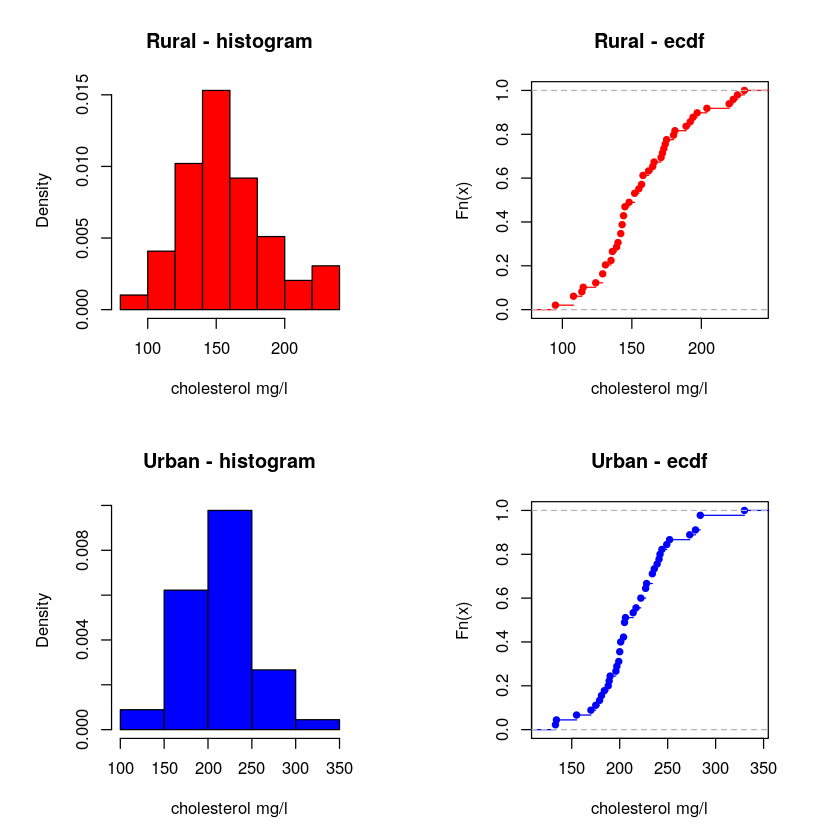

In [7]:
par(mfrow = c(2, 2),  pty="s")

# rural
hist(rural, col="red", main="Rural - histogram", probability=T, xlab="cholesterol mg/l")
plot.ecdf(rural, col="red", main="Rural - ecdf", xlab="cholesterol mg/l")

# urban
hist(urban, col="blue", main = "Urban - histogram", probability=T, xlab="cholesterol mg/l")
plot.ecdf(urban, col="blue", main="Urban - ecdf", xlab="cholesterol mg/l")

- [ ] (3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

#### Odhady rozdělení
Pro provedení odhadu jsou využity funkce mean() a sd() zabudované do standardní knihovny jazyka R. Odhad je proveden shodně i pro množinu urban.

Pro odhad normálního a exponenciálního rozdělení jsme využili momentovou metodu. Pro odhad uniformního rozdělení metodu maximální věrohodnosti.

##### Normální rozdělení
``` R
EX = mean(rural)
s = sd(rural)
```

##### Exponenciální rozdělení
``` R
lambda = 1/mean(rural)
```

##### Uniformní rozdělení
``` R
a = min(rural)
b = max(rural)
```

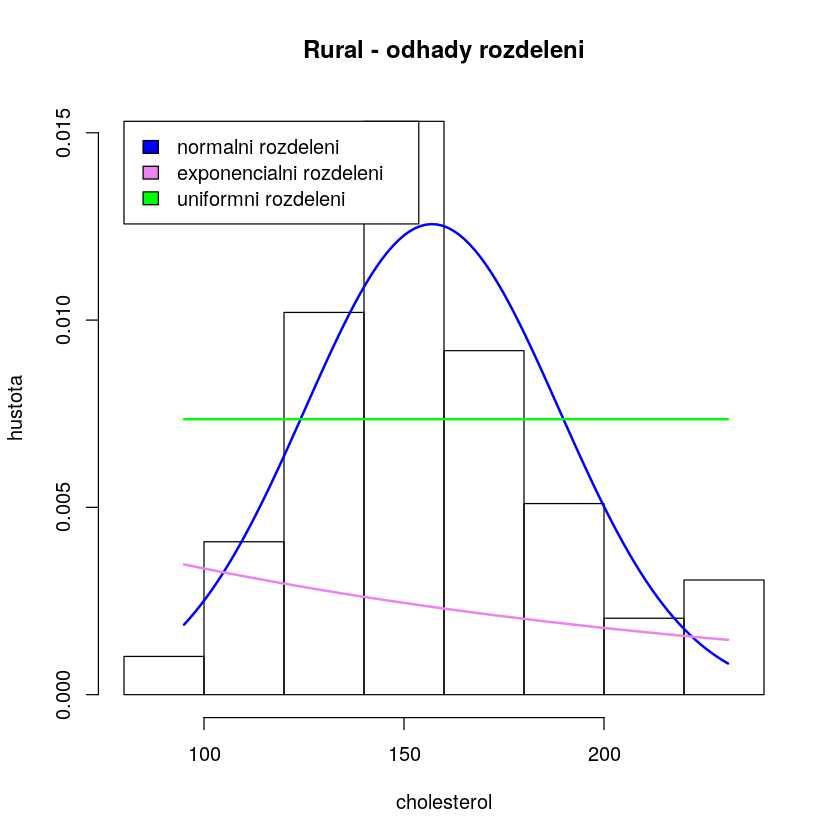

In [8]:
x <- seq(min(rural), max(rural), length=100)

# hodnoty pro jednotlivá rozložení
y_norm <- dnorm(x, mean=mean(rural), sd=sd(rural))
y_exp <- dexp(x, 1/mean(rural))
y_unif <- dunif(x, min=min(rural), max=max(rural))

hist(rural, probability=T, main="Rural - odhady rozdeleni", xlab="cholesterol", ylab="hustota")
lines(x, y_norm, col="blue", lwd=2)
lines(x, y_exp, col="violet", lwd=2) 
lines(x, y_unif, col="green", lwd=2)

legend("topleft", inset=0.037, fill=c("blue","violet","green"), 
       legend=c("normalni rozdeleni", "exponencialni rozdeleni", "uniformni rozdeleni"))

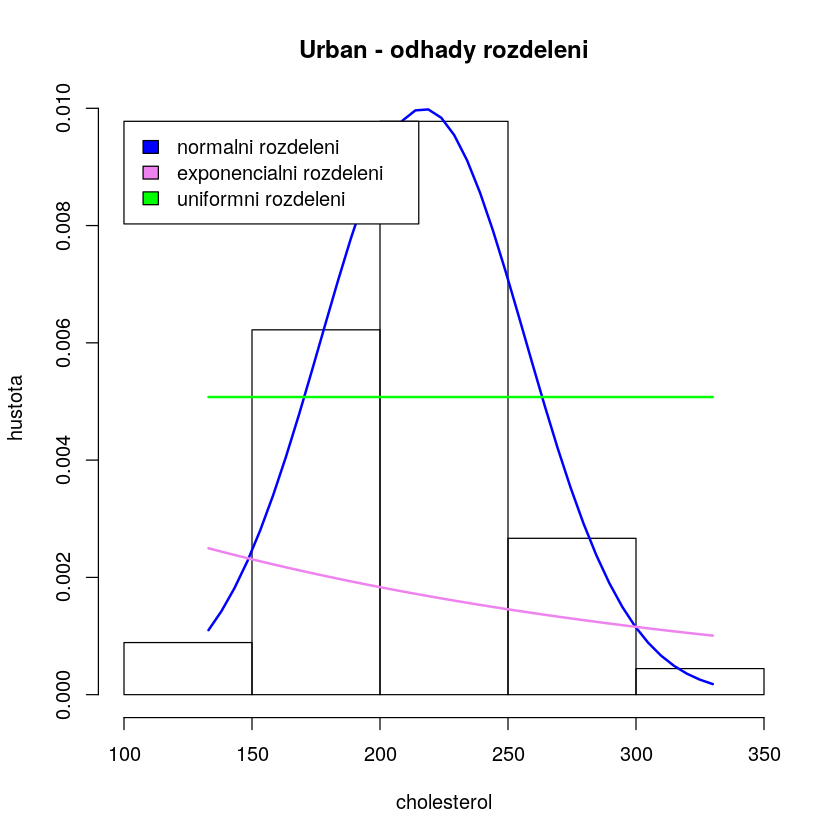

In [9]:
x <- seq(min(urban), max(urban), length=40)

y_norm <- dnorm(x, mean=mean(urban), sd=sd(urban))
y_exp <- dexp(x, 1/mean(urban))
y_unif <- dunif(x, min=min(urban), max=max(urban))

hist(urban, probability=T, main="Urban - odhady rozdeleni", xlab="cholesterol", ylab="hustota")
lines(x, y_norm, col="blue", lwd=2)
lines(x, y_exp, col="violet", lwd=2) 
lines(x, y_unif, col="green", lwd=2)

legend("topleft", inset=0.037, fill=c("blue","violet","green"), 
       legend=c("normalni rozdeleni", "exponencialni rozdeleni", "uniformni rozdeleni"))

- [ ] (1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

Na náš dataset se nejvíc hodí normální rozdělení. Parametry jsme odhadli pomocí knihovních funkcí mean() a sd(). Samotný náhodný výběr jsme vygenerovali následujícím příkazem:
```R
rnorm(100, mean=mean(urban), sd=sd(urban))
```

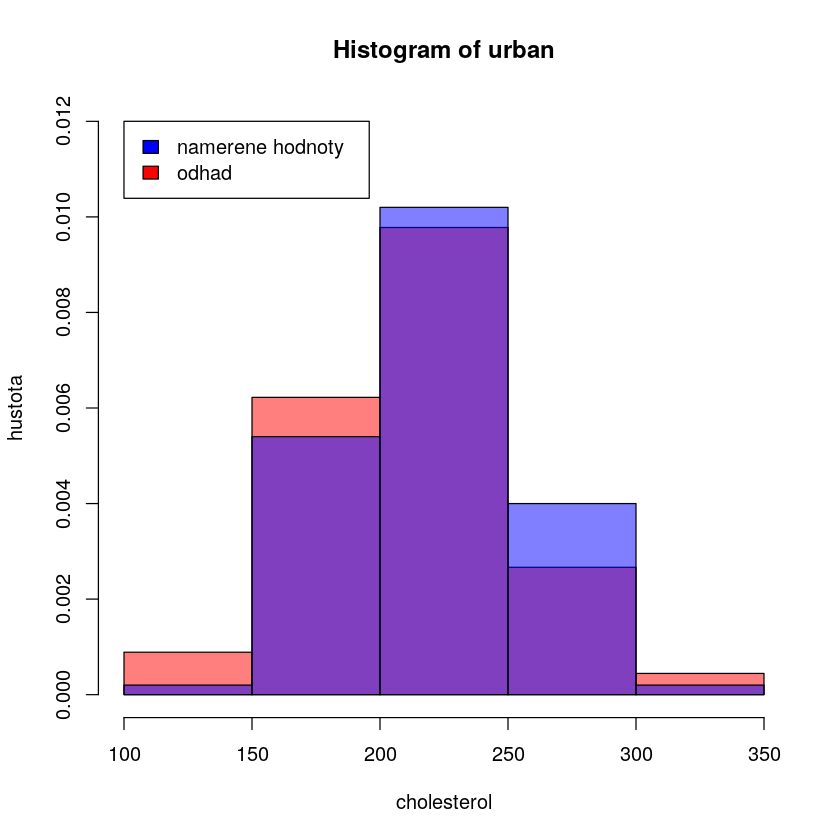

In [10]:
y <- rnorm(100, mean=mean(urban), sd=sd(urban))

hist(urban, probability=T, col=rgb(1, 0, 0, 0.5), ylim=c(0, 0.012), xlab="cholesterol", ylab="hustota", breaks=6)
hist(y, probability=T, col=rgb(0, 0, 1, 0.5), add=T, breaks=6)
legend("topleft", inset=0.037, fill=c("blue","red"), legend=c("namerene hodnoty", "odhad"))

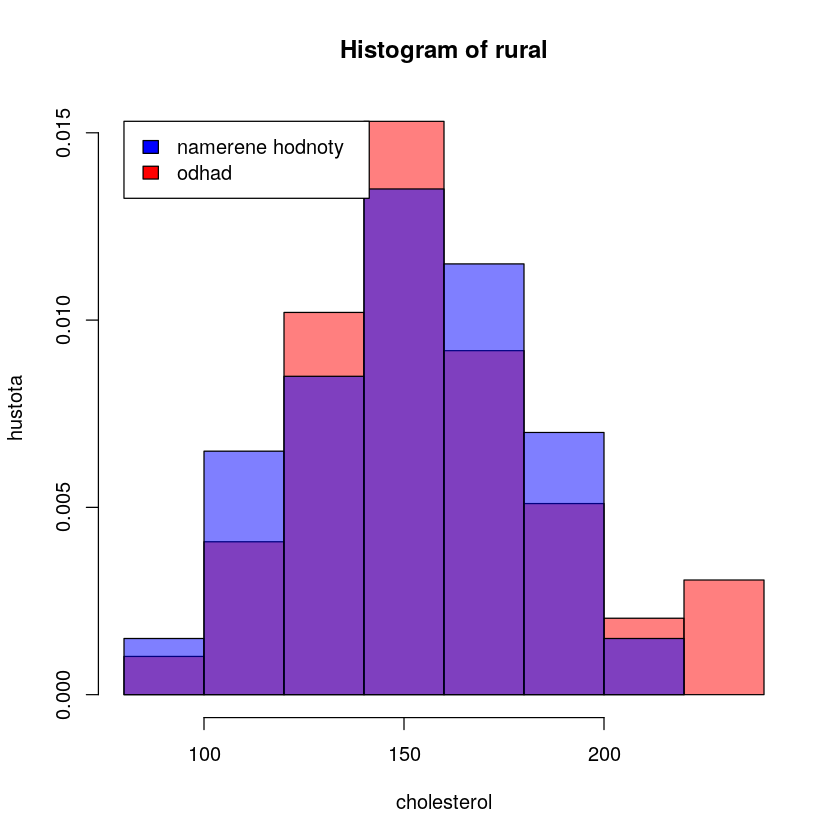

In [11]:
y <- rnorm(100, mean=mean(rural), sd=sd(rural))

hist(rural, probability=T, col=rgb(1, 0, 0, 0.5), xlab="cholesterol", ylab="hustota", breaks=6)
hist(y, probability=T, col=rgb(0, 0, 1, 0.5), add=T, breaks=6)
legend("topleft", inset=0.037, fill=c("blue","red"), 
       legend=c("namerene hodnoty", "odhad"))

- [ ] (1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [12]:
ex <- mean(urban)
s <- sd(urban)
n <- length(urban)
error <- qt(0.975, df=n-1)*s/sqrt(n)
left <- ex-error
right <- ex+error

cat("oboustranný 95% konfidenční interval pro střední hodnotu urban:\n")
cat("(",left, ", ", right, ")\n")

oboustranný 95% konfidenční interval pro střední hodnotu urban:
( 204.8733 ,  228.86 )


In [13]:
ex <- mean(rural)
s <- sd(rural)
n <- length(rural)
error <- qt(0.975, df=n-1)*s/sqrt(n)
left <- ex-error
right <- ex+error

cat("oboustranný 95% konfidenční interval pro střední hodnotu rural:\n")
cat("(",left, ", ", right, ")\n")

oboustranný 95% konfidenční interval pro střední hodnotu rural:
( 147.8785 ,  166.1215 )


- [ ] (1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [15]:
t.test(rural, y=2, alternative="two.sided", conf.level = 0.95)

ERROR: Error in t.test.default(rural, y = 2, alternative = "two.sided", conf.level = 0.95): not enough 'y' observations


Rural: Testovaná hodnota EX=K=2 v intervalu neleží, takže můžeme hypotézu vyváženosti na hladině významnosti 5% zamítnout ve prospěch alternativy, že je pravděpodobnost, že EX=2 je významně odlišná.

Urban: Testovaná hodnota EX=K=2 v intervalu neleží, takže můžeme hypotézu vyváženosti na hladině významnosti 5% zamítnout ve prospěch alternativy, že je pravděpodobnost, že EX=2 je významně odlišná.

- [ ] (2b) Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

In [145]:
# TODO